# EDA – Copa Libertadores (dataset mock)

Este notebook realiza una exploración inicial (EDA) sobre un dataset de prueba
(mock) de partidos de Copa Libertadores, con el objetivo de validar el pipeline
de análisis antes de trabajar con datos reales (RSSSF).


In [4]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

RUTA = Path("datos/procesados/partidos_rsssf1_validos_normalizado.csv")
CARPETA_SALIDA = Path("reportes/eda_rsssf1_validos")
CARPETA_SALIDA.mkdir(parents=True, exist_ok=True)

In [5]:
from pathlib import Path

RAIZ_REPO = Path.cwd().parent  # porque estás en /notebooks
print("RAIZ_REPO:", RAIZ_REPO)

RUTA = RAIZ_REPO / "datos" / "procesados" / "partidos_rsssf1_validos_normalizado.csv"
print("Existe archivo:", RUTA.exists(), "|", RUTA)

RAIZ_REPO: c:\Users\Lorenzo\Desktop\coding\Libertadores-1996-2024
Existe archivo: True | c:\Users\Lorenzo\Desktop\coding\Libertadores-1996-2024\datos\procesados\partidos_rsssf1_validos_normalizado.csv


In [6]:
df = pd.read_csv(RUTA)
df.head()

,temporada,competicion,fase,instancia,fecha,pais_sede,ciudad_sede,estadio,equipo_local,equipo_visitante,...,pais_visitante,goles_local,goles_visitante,resultado,fuente,url_fuente,id_partido_fuente,observaciones,resultado_norm,fecha_parseada
0,1996,Copa Libertadores,Grupos,Group 1,1996-03-13,NaN,NaN,NaN,Barcelona SC,Espoli,...,NaN,3,2,L,RSSSF,NaN,NaN,NaN,L,1996-03-13
1,1996,Copa Libertadores,Grupos,Group 1,1996-03-13,NaN,NaN,NaN,Olimpia,Cerro Porteño,...,NaN,1,2,V,RSSSF,NaN,NaN,NaN,V,1996-03-13
2,1996,Copa Libertadores,Grupos,Group 1,1996-03-19,NaN,NaN,NaN,Espoli,Olimpia,...,NaN,1,0,L,RSSSF,NaN,NaN,NaN,L,1996-03-19
3,1996,Copa Libertadores,Grupos,Group 1,1996-03-22,NaN,NaN,NaN,Barcelona SC,Olimpia,...,NaN,2,1,L,RSSSF,NaN,NaN,NaN,L,1996-03-22
4,1996,Copa Libertadores,Grupos,Group 1,1996-03-26,NaN,NaN,NaN,Espoli,Cerro Porteño,...,NaN,2,1,L,RSSSF,NaN,NaN,NaN,L,1996-03-26


In [7]:
df.shape, df.columns.tolist()

((2281, 21),
 ['temporada',
  'competicion',
  'fase',
  'instancia',
  'fecha',
  'pais_sede',
  'ciudad_sede',
  'estadio',
  'equipo_local',
  'equipo_visitante',
  'pais_local',
  'pais_visitante',
  'goles_local',
  'goles_visitante',
  'resultado',
  'fuente',
  'url_fuente',
  'id_partido_fuente',
  'observaciones',
  'resultado_norm',
  'fecha_parseada'])

In [8]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2281 entries, 0 to 2280
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temporada          2281 non-null   int64  
 1   competicion        2281 non-null   object 
 2   fase               2281 non-null   object 
 3   instancia          1618 non-null   object 
 4   fecha              2281 non-null   object 
 5   pais_sede          0 non-null      float64
 6   ciudad_sede        0 non-null      float64
 7   estadio            0 non-null      float64
 8   equipo_local       2281 non-null   object 
 9   equipo_visitante   2281 non-null   object 
 10  pais_local         0 non-null      float64
 11  pais_visitante     0 non-null      float64
 12  goles_local        2281 non-null   int64  
 13  goles_visitante    2281 non-null   int64  
 14  resultado          2281 non-null   object 
 15  fuente             2281 non-null   object 
 16  url_fuente         0 non

temporada               0
competicion             0
fase                    0
instancia             663
fecha                   0
pais_sede            2281
ciudad_sede          2281
estadio              2281
equipo_local            0
equipo_visitante        0
pais_local           2281
pais_visitante       2281
goles_local             0
goles_visitante         0
resultado               0
fuente                  0
url_fuente           2281
id_partido_fuente    2281
observaciones        2243
resultado_norm          0
fecha_parseada          0
dtype: int64

In [9]:
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")
df["goles_local"] = pd.to_numeric(df["goles_local"], errors="coerce")
df["goles_visitante"] = pd.to_numeric(df["goles_visitante"], errors="coerce")

In [10]:
resumen = {
    "filas": len(df),
    "temporadas_unicas": df["temporada"].nunique(),
    "min_fecha": df["fecha"].min(),
    "max_fecha": df["fecha"].max(),
    "prom_goles_local": df["goles_local"].mean(),
    "prom_goles_visitante": df["goles_visitante"].mean(),
}
resumen

{'filas': 2281,
 'temporadas_unicas': 28,
 'min_fecha': Timestamp('1996-03-13 00:00:00'),
 'max_fecha': Timestamp('2024-06-04 00:00:00'),
 'prom_goles_local': np.float64(1.7593160894344586),
 'prom_goles_visitante': np.float64(0.9789565979833407)}

In [11]:
pd.DataFrame([resumen]).to_csv(
    CARPETA_SALIDA / "resumen_basico.csv",
    index=False
)

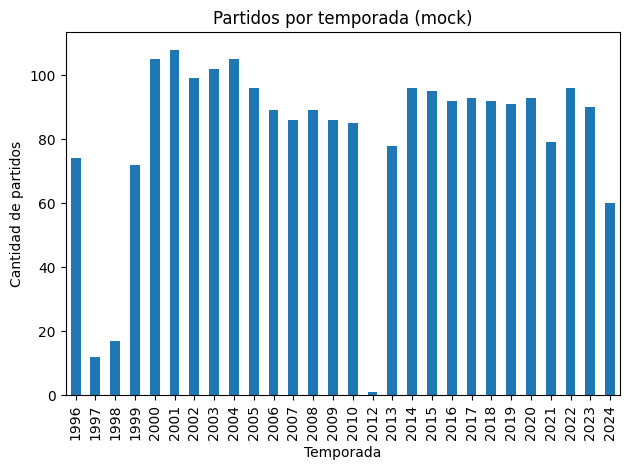

In [12]:
partidos_por_temporada = df.groupby("temporada").size().sort_index()
partidos_por_temporada.to_csv(
    CARPETA_SALIDA / "partidos_por_temporada.csv"
)

plt.figure()
partidos_por_temporada.plot(kind="bar")
plt.title("Partidos por temporada (mock)")
plt.xlabel("Temporada")
plt.ylabel("Cantidad de partidos")
plt.tight_layout()
plt.savefig(CARPETA_SALIDA / "partidos_por_temporada.png", dpi=200)
plt.show()

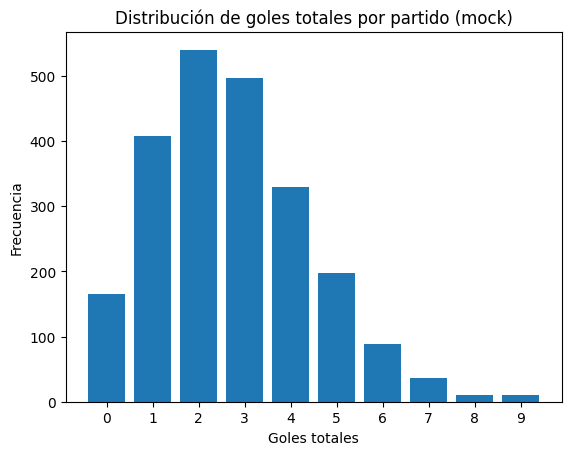

In [13]:
df["goles_totales"] = df["goles_local"] + df["goles_visitante"]

plt.figure()
plt.hist(df["goles_totales"].dropna(), bins=int(df["goles_totales"].max()), align="left", rwidth=0.8)
plt.title("Distribución de goles totales por partido (mock)")
plt.xlabel("Goles totales")
plt.ylabel("Frecuencia")
plt.xticks(range(0, int(df["goles_totales"].max())))
#plt.tight_layout()
plt.savefig(
    CARPETA_SALIDA / "distribucion_goles_totales.png",
    dpi=200
)
plt.show()

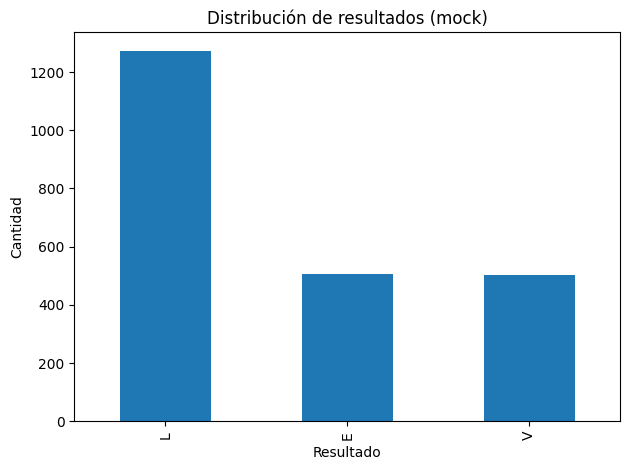

In [14]:
conteo_resultados = df["resultado"].value_counts()
conteo_resultados.to_csv(
    CARPETA_SALIDA / "conteo_resultados.csv"
)

plt.figure()
conteo_resultados.plot(kind="bar")
plt.title("Distribución de resultados (mock)")
plt.xlabel("Resultado")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.savefig(CARPETA_SALIDA / "conteo_resultados.png", dpi=200)
plt.show()

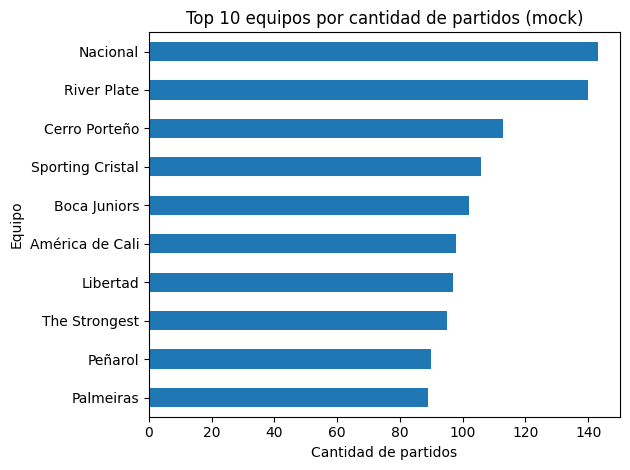

In [15]:
equipos = pd.concat([df["equipo_local"], df["equipo_visitante"]])
top_equipos = equipos.value_counts().head(10)
top_equipos.to_csv(
    CARPETA_SALIDA / "top_equipos_partidos.csv"
)

plt.figure()
top_equipos.sort_values().plot(kind="barh")
plt.title("Top 10 equipos por cantidad de partidos (mock)")
plt.xlabel("Cantidad de partidos")
plt.ylabel("Equipo")
plt.tight_layout()
plt.savefig(
    CARPETA_SALIDA / "top_equipos_partidos.png",
    dpi=200
)
plt.show()

In [16]:
lineas = [
    f"- Filas analizadas: {len(df)}",
    f"- Temporadas presentes: {df['temporada'].nunique()} "
    f"(rango {df['temporada'].min()}–{df['temporada'].max()})",
    f"- Promedio goles local: {df['goles_local'].mean():.2f}",
    f"- Promedio goles visitante: {df['goles_visitante'].mean():.2f}",
    f"- Resultado más frecuente: {df['resultado'].value_counts().idxmax()}",
]

(CARPETA_SALIDA / "resumen.md").write_text(
    "# EDA mock – Resumen\n\n" + "\n".join(lineas) + "\n",
    encoding="utf-8"
)


183